In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('/regression_data.csv')

X = df.drop(columns=['SalePrice'])

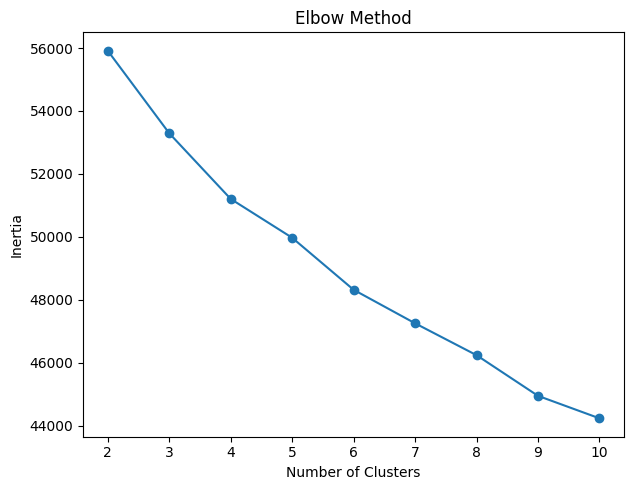

In [ ]:
inertia = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=6740, n_init=10)
    labels = kmeans.fit_predict(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')


plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


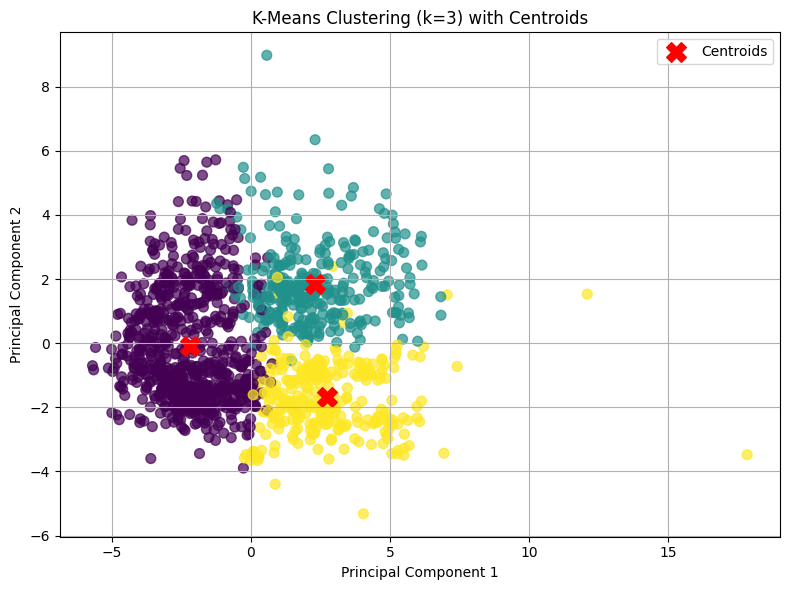

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)
centroids_2d = pca.transform(centroids)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, s=50, alpha=0.7)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title("K-Means Clustering (k=3) with Centroids")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df['Cluster'] = labels

avg_prices = df.groupby('Cluster')['SalePrice'].mean()
print("Average Sale Price per Cluster:\n", avg_prices)

Average Sale Price per Cluster:
 Cluster
0    130520.909477
1    217051.194268
2    227986.036424
Name: SalePrice, dtype: float64


In [ ]:
cluster_counts = df['Cluster'].value_counts()
print("Number of Houses per Cluster:\n", cluster_counts)

Number of Houses per Cluster:
 Cluster
0    707
1    314
2    302
Name: count, dtype: int64


In [ ]:
cluster_profile = df.groupby('Cluster').mean().round(2)
cluster_profile[['SalePrice']]

,SalePrice
Cluster,
0,130520.91
1,217051.19
2,227986.04
